# Курсовая работа
## Выполнила студентка группы БФИ2201
## Мирзобоева С.

Написать программу, которая будет считывать данные из CSV файла, содержащего
информацию о продажах товаров в магазине. Данные в файле содержатся в следующем
формате:
| Номер заказа | Дата заказа | Название товара | Категория товара | Количество продаж | Цена
за единицу | Общая стоимость |
Необходимо:
1. Рассчитать общую выручку магазина.
2. Найти товар, который был продан наибольшее количество раз.
3. Найти товар, который принес наибольшую выручку.
4. Составить отчет, содержащий информацию об общей выручке магазина, количестве
проданных единиц каждого товар и доле каждого товара в общей выручке.
Для решения задач необходимо использовать структуры данных, такие как массивы и
хеш-таблицы, а также различные алгоритмы обработки данных, например, сортировку и поиск.
Также необходимо учитывать возможные ошибки ввода-вывода и обрабатывать их в
соответствии с требованиями

# Ход работы:

In [2]:
import csv
from collections import Counter
import matplotlib.pyplot as plt

def calculate_total_revenue(file_path):
    total_revenue = 0

    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            reader = csv.reader(file, delimiter=';')
            next(reader)  # Пропустить заголовок файла, если он есть

            for row in reader:
                try:
                    total_cost = int(row[6])
                    total_revenue += total_cost
                except (IndexError, ValueError):
                    print(f"Ошибка при обработке строки: {row}")
                    continue

    except FileNotFoundError:
        print(f"Файл '{file_path}' не найден.")
    except Exception as e:
        print(f"Произошла ошибка: {e}")

    return total_revenue

def find_most_sold_item(file_path):
    item_sales = Counter()

    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            reader = csv.reader(file, delimiter=';')
            next(reader)  # Пропустить заголовок файла, если он есть

            for row in reader:
                try:
                    item_name = row[2]
                    item_quantity = int(row[4])
                    item_sales[item_name] += item_quantity
                except (IndexError, ValueError):
                    print(f"Ошибка при обработке строки: {row}")
                    continue

    except FileNotFoundError:
        print(f"Файл '{file_path}' не найден.")
    except Exception as e:
        print(f"Произошла ошибка: {e}")

    if item_sales:
        most_sold_item = max(item_sales, key=item_sales.get)
        return most_sold_item
    else:
        return None

def find_highest_revenue_item(file_path):
    item_revenues = {}

    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            reader = csv.reader(file, delimiter=';')
            next(reader)  # Пропустить заголовок файла, если он есть

            for row in reader:
                try:
                    item_name = row[2]
                    item_price = int(row[5])
                    item_quantity = int(row[4])
                    item_revenue = item_price * item_quantity

                    if item_name in item_revenues:
                        item_revenues[item_name] += item_revenue
                    else:
                        item_revenues[item_name] = item_revenue
                except (IndexError, ValueError):
                    print(f"Ошибка при обработке строки: {row}")
                    continue

    except FileNotFoundError:
        print(f"Файл '{file_path}' не найден.")
    except Exception as e:
        print(f"Произошла ошибка: {e}")

    if item_revenues:
        highest_revenue_item = max(item_revenues, key=item_revenues.get)
        return highest_revenue_item
    else:
        return None

file_path = '/content/table.csv'
total_revenue = calculate_total_revenue(file_path)
print(f"Общая выручка магазина: {total_revenue} рублей")

most_sold_item = find_most_sold_item(file_path)
print(f"Товар, который был продан наибольшее количество раз: {most_sold_item}")


highest_revenue_item = find_highest_revenue_item(file_path)
print(f"Товар, который принес наибольшую выручку: {highest_revenue_item}")

Общая выручка магазина: 2414000 рублей
Товар, который был продан наибольшее количество раз: BMW M5
Товар, который принес наибольшую выручку: Lixiang L9


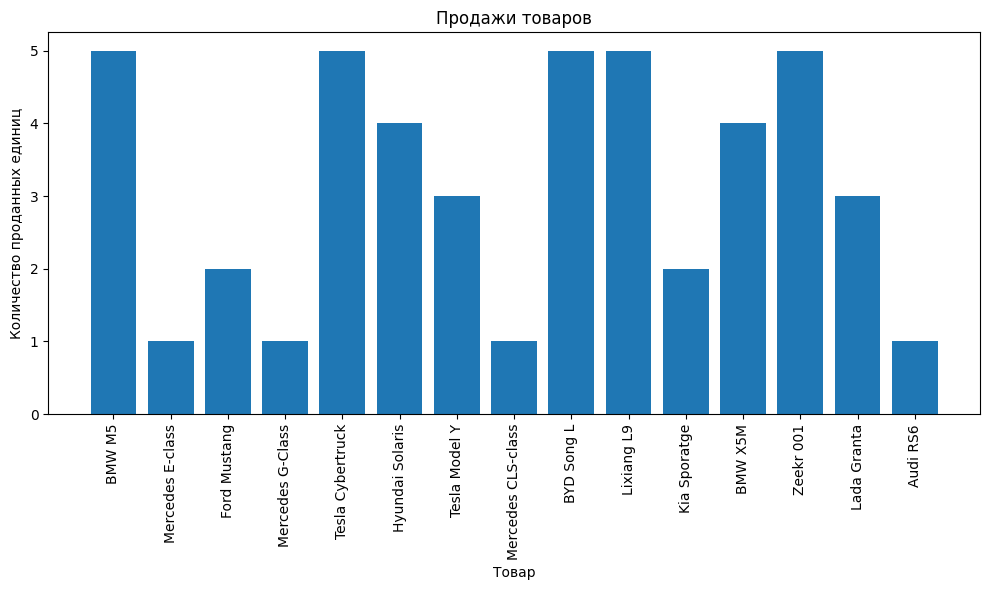

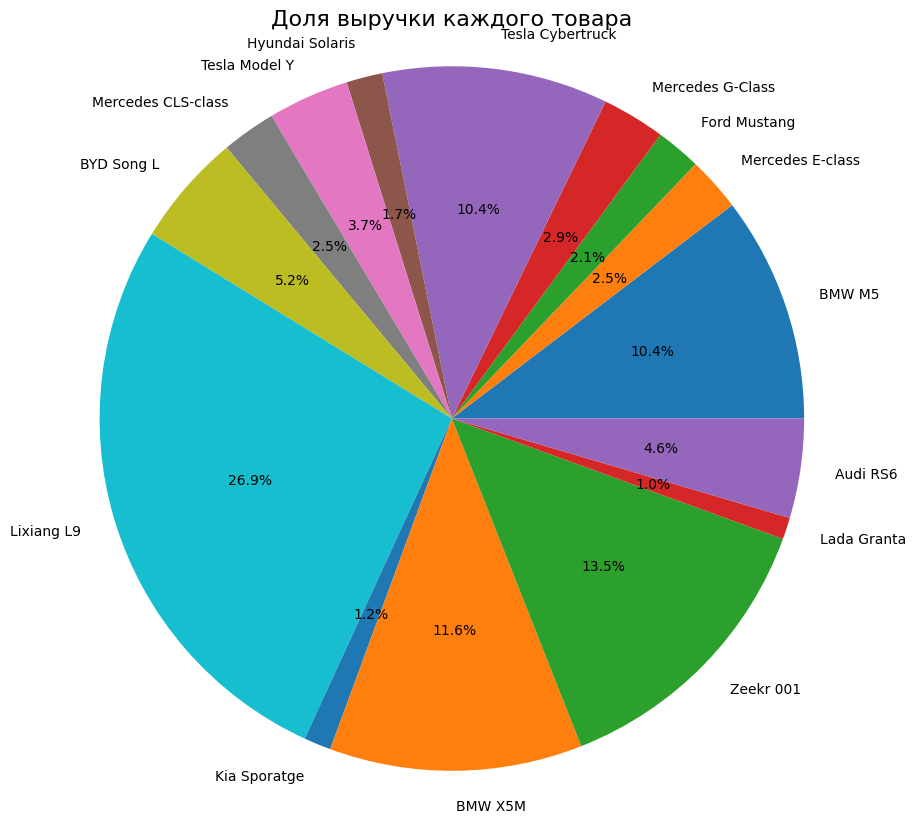

Общая выручка магазина: 2414000 рублей

BMW M5 был продан 5 раз, доля товара составляет 10.36%
Mercedes E-class был продан 1 раз, доля товара составляет 2.49%
Ford Mustang был продан 2 раз, доля товара составляет 2.07%
Mercedes G-Class был продан 1 раз, доля товара составляет 2.90%
Tesla Cybertruck был продан 5 раз, доля товара составляет 10.36%
Hyundai Solaris был продан 4 раз, доля товара составляет 1.66%
Tesla Model Y был продан 3 раз, доля товара составляет 3.73%
Mercedes CLS-class был продан 1 раз, доля товара составляет 2.49%
BYD Song L был продан 5 раз, доля товара составляет 5.18%
Lixiang L9 был продан 5 раз, доля товара составляет 26.93%
Kia Sporatge был продан 2 раз, доля товара составляет 1.24%
BMW X5M был продан 4 раз, доля товара составляет 11.60%
Zeekr 001 был продан 5 раз, доля товара составляет 13.46%
Lada Granta был продан 3 раз, доля товара составляет 0.99%
Audi RS6 был продан 1 раз, доля товара составляет 4.56%



In [7]:
def generate_report(file_path):
    total_revenue = 0
    item_sales = Counter()
    item_revenues = {}
    item_revenue_shares = {}

    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            reader = csv.reader(file, delimiter=';')
            next(reader)  # Пропустить заголовок файла, если он есть

            for row in reader:
                try:
                    item_name = row[2]
                    item_price = int(row[5])
                    item_quantity = int(row[4])
                    item_revenue = item_price * item_quantity

                    total_revenue += item_revenue
                    item_sales[item_name] += item_quantity
                    if item_name in item_revenues:
                        item_revenues[item_name] += item_revenue
                    else:
                        item_revenues[item_name] = item_revenue
                except (IndexError, ValueError):
                    print(f"Ошибка при обработке строки: {row}")
                    continue

    except FileNotFoundError:
        print(f"Файл '{file_path}' не найден.")
        return ""
    except Exception as e:
        print(f"Произошла ошибка: {e}")
        return ""

    report = f"Общая выручка магазина: {total_revenue} рублей\n\n"

    for item, quantity in item_sales.items():
        item_revenue = item_revenues[item]
        revenue_share = (item_revenue / total_revenue) * 100
        report += f"{item} был продан {quantity} раз, доля товара составляет {revenue_share:.2f}%\n"
        item_revenue_shares[item] = revenue_share

    # Создание круговой диаграммы
    plt.figure(figsize=(10, 6))
    plt.bar(item_sales.keys(), item_sales.values())
    plt.xlabel('Товар')
    plt.ylabel('Количество проданных единиц')
    plt.title('Продажи товаров')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Создание круговой диаграммы
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.pie(item_revenue_shares.values(), labels=item_revenue_shares.keys(), autopct='%1.1f%%')
    ax.axis('equal')
    ax.set_title('Доля выручки каждого товара', fontsize=16)
    plt.show()
    return report

report = generate_report(file_path)
if report:
    print(report)
else:
    print("Не удалось сгенерировать отчет.")

# Вывод:

Написала программу, которая будет считывать данные из CSV файла, содержащего информацию о продажах товаров в магазине.
Рассчитала общую выручку магазина.
Нашла товар, который был продан наибольшее количество раз.
Нашла товар, который принес наибольшую выручку.
Составила отчет, содержащий информацию об общей выручке магазина, количестве проданных единиц каждого товар и доле каждого товара в общей выручке.  